# Six Views of a Point Charge

One of the challenges of electrodynamics is developing an intuition for potentials and fields.  What is a field?  What does it *look* like?

We can answer the first question with a formal definition.  A ***field*** is a mathematical object that assigns a quantity to every point in space.  If the quantity is just a number, we call the object a ***scalar field***.  If the quantity is a vector, we call the object a ***vector field***.

It is hard to say what a field "looks like".  What does temperature look like?  What does gravity look like?  Even if we can't see the quantity in question, we have many ways to represent it.  This problem will introduce you to some useful Python functions as we explore the potentials and electric fields of electric charges.

## Point Charge

The electrostatic potential of a point charge is
$$V(\vec{r}) = \dfrac{kq}{r}$$

The electric field of a point charge is
$$\vec{E}(\vec{r}) = \dfrac{kq}{r^2} \hat{r}$$

The following Python ***functions*** will compute the potential and electric field of a point charge.

In [1]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Define functions to calculate fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

In [3]:
X, Y, Z = coordinates()
V = potential()
Ex, Ey, Ez = field()

Now that we have a scalar field and a vector field, let's look at them!

### 1. 1D Slices of Potential

The following code will plot the potential along three lines through a point you specify: one line parallel to the x-axis, one parallel to the y-axis, and one parallel to the z-axis.

The slices are taken through (x0,y0,z0) = (0, 0.55, 2.5).


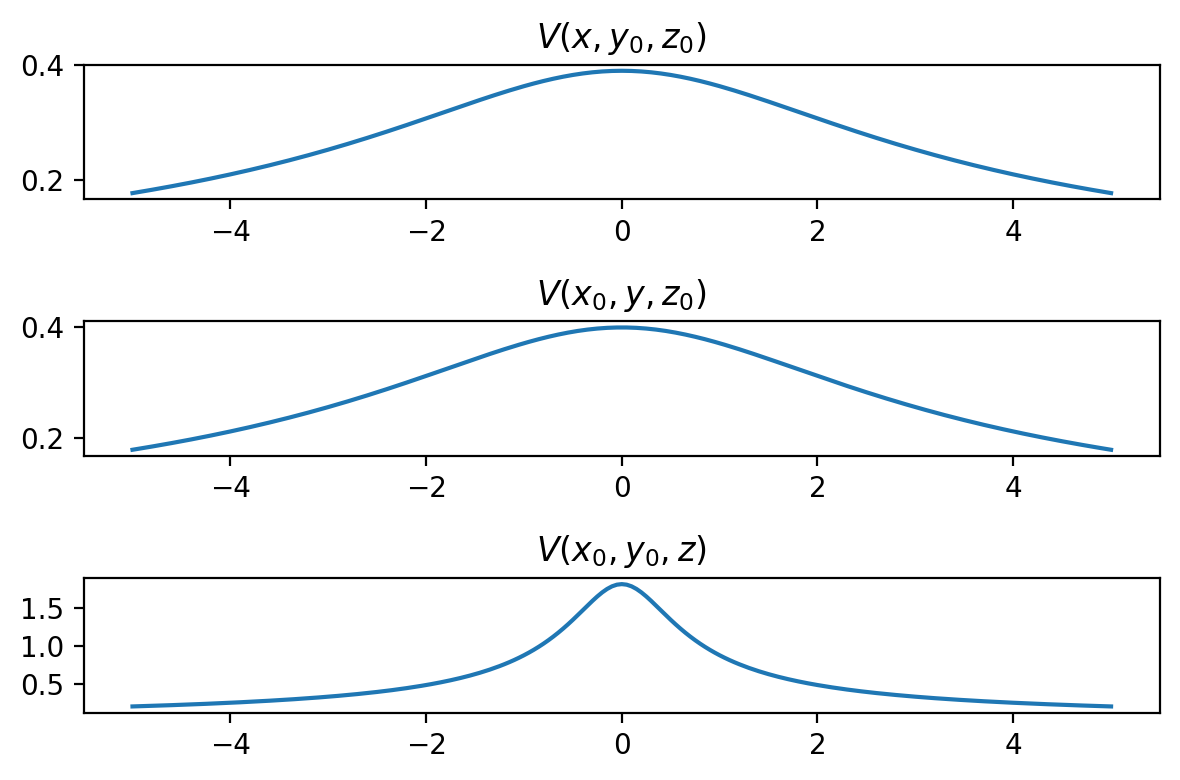

In [58]:
# Choose coordinate indices for slices.
x0 = 100
y0 = 111
z0 = 150

x_val = X[x0,y0,z0]
y_val = Y[x0,y0,z0]
z_val = Z[x0,y0,z0]

print("The slices are taken through (x0,y0,z0) = (%g, %g, %g)." % (x_val, y_val, z_val))

# Create a figure and plot the slices.
fig, ax = plt.subplots(3, dpi=200)

# Plot V(x,y0,z0)
x = X[:,y0,z0]
v1 = V[:,y0,z0]
ax[0].plot(x,v1)
ax[0].set_title(r"$V(x,y_0,z_0)$")

# Plot V(x0,y,z0)
y = Y[x0,:,z0]
v2 = V[x0,:,z0]
ax[1].plot(y,v2)
ax[1].set_title(r"$V(x_0,y,z_0)$")

# Plot V(x0,y0,z)
z = Z[x0,y0,:]
v3 = V[x0,y0,:]
ax[2].plot(z,v3)
ax[2].set_title(r"$V(x_0,y_0,z)$")


fig.tight_layout()

Change the values of `x0`, `y0`, and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the potential reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This 1D view of the potential shows how the potential varies in each direction based on the chosen coordinate indices. These graphs show that the potential of the charge peaks when measured at zero for each direction. This makes sense as the charge is located at the origin meaning as we measure further from the origin, the lower the potential. The limits of the coordinate indices are 0 to 200, which covers the -5 to +5 box_size range. When all coordinate indices are set to 0 (slices taken through (-5,-5,-5)), the max potential is approximately 0.14 Volts, and when all coordinate indices are set to 100 (slices taken through (0,0,0)) of the linspace of 201), the max potentential reaches 1 megaVolt. This kind of representation is helpful for obatining a specific value of potential, but not so much when trying to see the whole picture.

### 2. 2D Slices of Potential

The cell below will plot a 2D slice of the potential through a height that you specify.

It will display a surface plot and a heatmap. 

The slice is taken through z0 = -5.


(-5.0, 5.0, -5.0, 5.0)

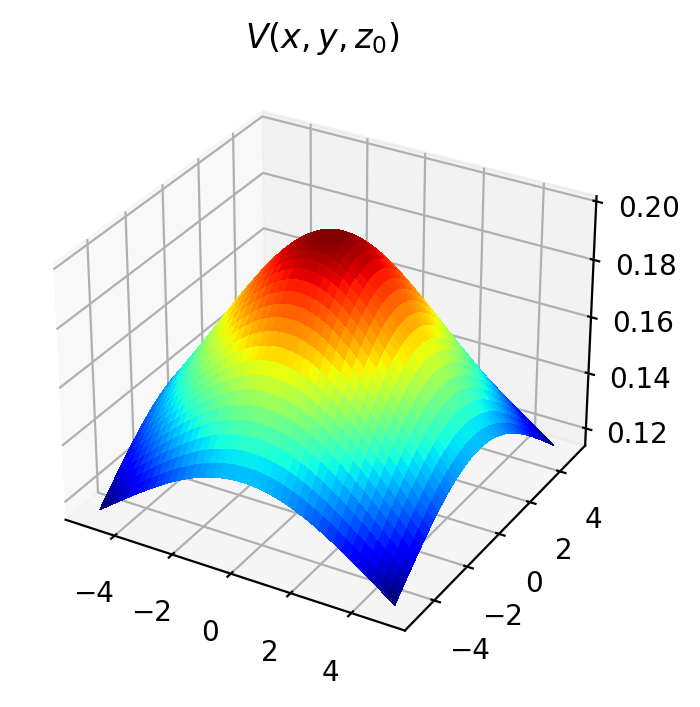

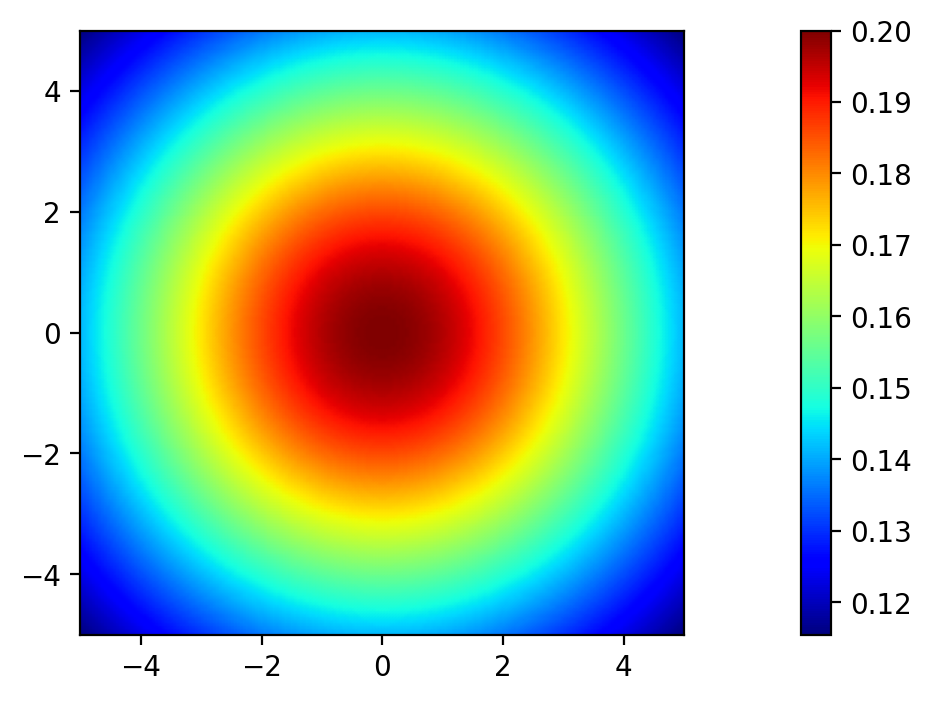

In [45]:
# Choose z-coordinate index for slices.
z0 = 0
z_val = Z[x0,y0,z0]

print("The slice is taken through z0 = %g." % z_val)

# Get slice
x = X[:,:,z0]
y = Y[:,:,z0]
v = V[:,:,z0]

# Create a surface plot.
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(x,y,v, cmap='jet', antialiased=False, linewidth=0)
ax1.set_title(r"$V(x,y,z_0)$")

# Heatmap
fig, ax2 = plt.subplots(dpi=200)
image = ax2.pcolormesh(x,y,v, shading='gouraud', cmap='jet')
plt.colorbar(image, use_gridspec=True)
ax2.axis('scaled')

Change the value of `z0` in the cell above and run it again.  Do this several times.

What does this representation of the potential reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This 2D view of the potential shows how the potential changes when varied in two directions(x and y), given the specified height (z0). These graphs tell us again that the potential of the charge peaks at the origin and fades as we get further away. As before, the limits of the coordinate indices range from 0 to 200. The max potential of the charge when z0 is set to 0 (x,y,-5) appears to reach 0.20 Volts as oppossed to 0.14 Volts found in the previous simulation. The max potential of the charge when z0 is set to 100 (x,y,0) appears to reach 1 megaVolt similar to the previous simulation. This kind of representation is much better at showing the whole picture of the charge's potential.

### 3. 1D Slices of Electric Field

The following code will plot the components of the electric field along three lines through a point you specify: one line parallel to the x-axis, one parallel to the y-axis, and one parallel to the z-axis.

The slices are taken through (x0,y0,z0) = (0, 0.55, 2.5).


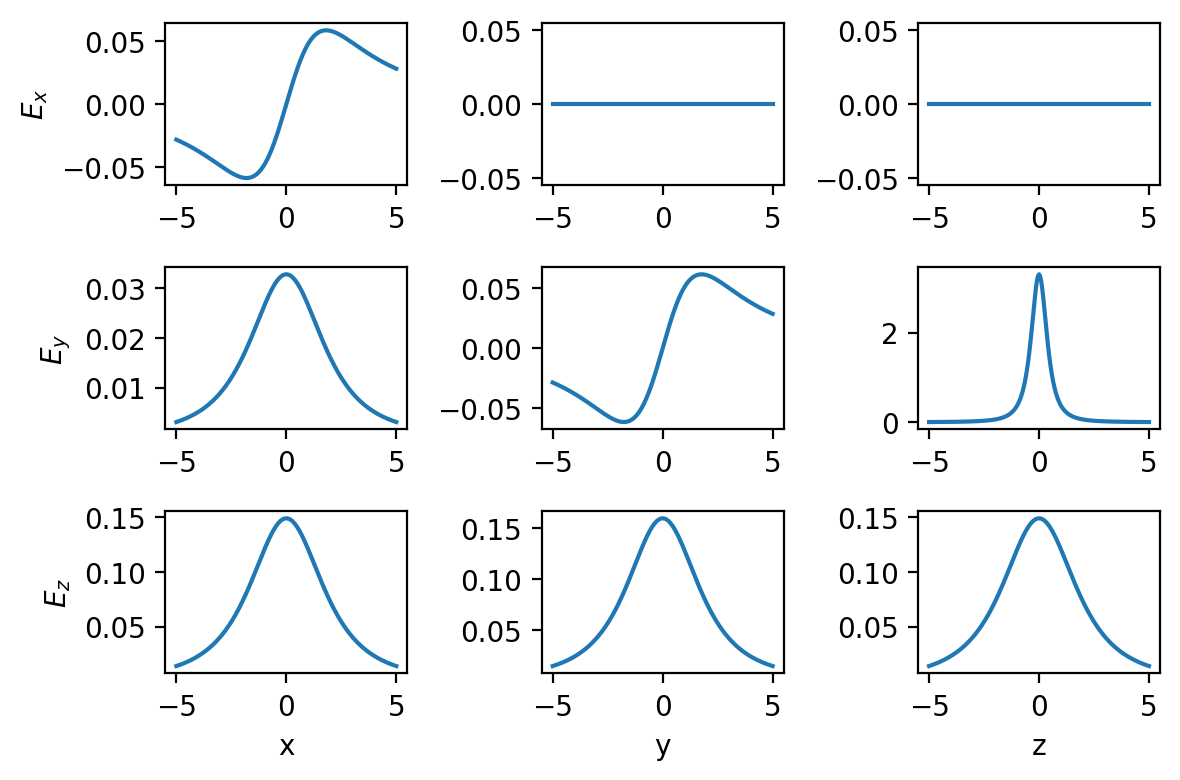

In [55]:
# Choose coordinate indices for slices.
x0 = 100
y0 = 111
z0 = 150

x_val = X[x0,y0,z0]
y_val = Y[x0,y0,z0]
z_val = Z[x0,y0,z0]

print("The slices are taken through (x0,y0,z0) = (%g, %g, %g)." % (x_val, y_val, z_val))

# Create a figure and plot the slices.
fig, ax = plt.subplots(3,3, dpi=200)

# Plot components of E(x,y0,z0)
x = X[:,y0,z0]
y = Y[x0,:,z0]
z = Z[x0,y0,:]


Ex1 = Ex[:,y0,z0]
ax[0,0].plot(x,Ex1)
ax[0,0].set_ylabel(r"$E_x$")

Ey1 = Ey[:,y0,z0]
ax[1,0].plot(x,Ey1)
ax[1,0].set_ylabel(r"$E_y$")

Ez1 = Ez[:,y0,z0]
ax[2,0].plot(x,Ez1)
ax[2,0].set_ylabel(r"$E_z$")
ax[2,0].set_xlabel('x')


Ex2 = Ex[x0,:,z0]
ax[0,1].plot(y,Ex2)

Ey2 = Ey[x0,:,z0]
ax[1,1].plot(y,Ey2)

Ez2 = Ez[x0,:,z0]
ax[2,1].plot(y,Ez2)
ax[2,1].set_xlabel('y')


Ex3 = Ex[x0,y0,:]
ax[0,2].plot(z,Ex3)

Ey3 = Ey[x0,y0,:]
ax[1,2].plot(z,Ey3)

Ez3 = Ez[:,y0,z0]
ax[2,2].plot(z,Ez3)
ax[2,2].set_xlabel('z')

fig.tight_layout()

Change the values of `x0`, `y0`, and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This representation of the electric field shows us how the electric field changes in one direction based on the inputed coordinate indices. These graphs provide the magnitude of the electric field in Volts/meter along its y axis and the -5 to +5 range along its x-axis. With so many graphs, it's very confusing to piece it all together into one picture. This is expecially true when the axes on the graphs shift to make the curve fit into view.

### 4. 2D Slices of Electric Field

The cell below will plot a 2D slice of the components of the electric field through a height that you specify.

It will display a surface plot and a heatmap of each component. 

The slice is taken through z0 = 2.5.


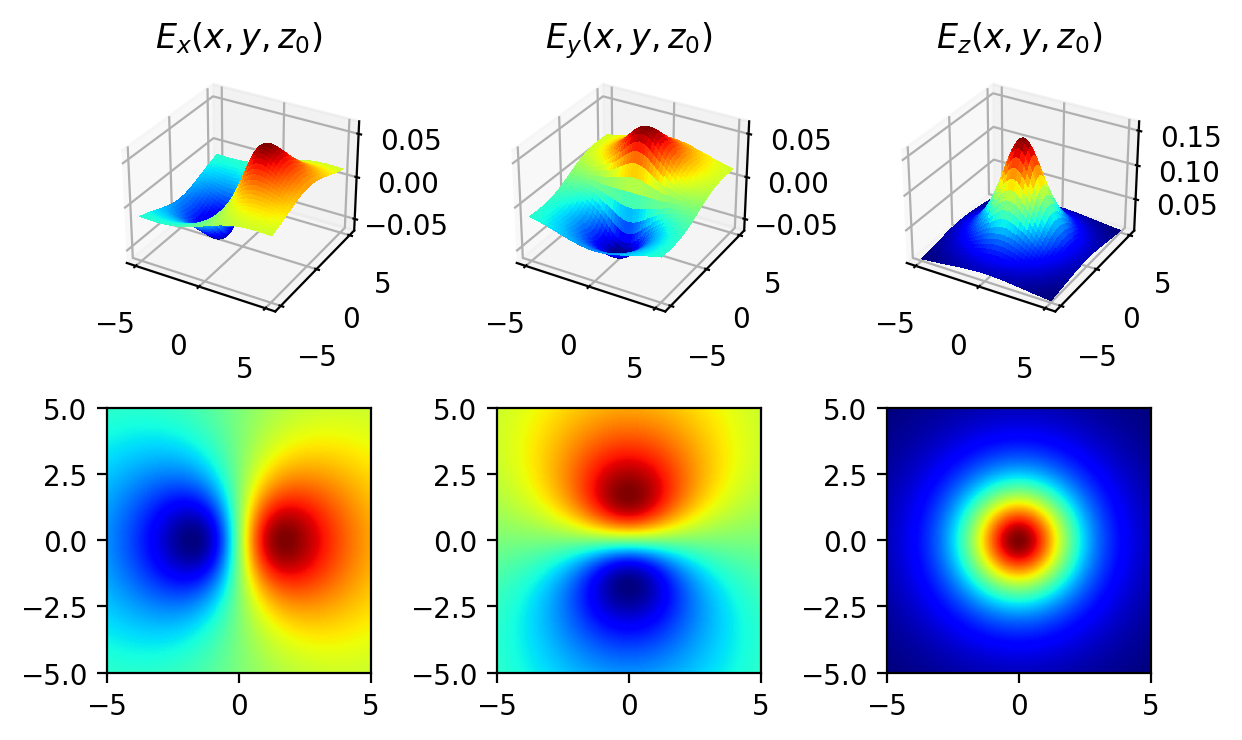

In [50]:
# Choose z-coordinate index for slices.
z0 = 150
z_val = Z[x0,y0,z0]

print("The slice is taken through z0 = %g." % z_val)

# Get slices
x = X[:,:,z0]
y = Y[:,:,z0]
ex = Ex[:,:,z0]
ey = Ey[:,:,z0]
ez = Ez[:,:,z0]

# Create a surface plots.
fig = plt.figure(dpi=200)

ax = fig.add_subplot(2,3,1, projection='3d')
ax.plot_surface(x,y,ex, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_x(x,y,z_0)$")

ax = fig.add_subplot(2,3,2, projection='3d')
ax.plot_surface(x,y,ey, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_y(x,y,z_0)$")

ax = fig.add_subplot(2,3,3, projection='3d')
ax.plot_surface(x,y,ez, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_z(x,y,z_0)$")

# Heatmaps
ax = fig.add_subplot(2,3,4)
image = ax.pcolormesh(x,y,ex, shading='gouraud', cmap='jet')
ax.axis('scaled')

ax = fig.add_subplot(2,3,5)
image = ax.pcolormesh(x,y,ey, shading='gouraud', cmap='jet')
ax.axis('scaled')

ax = fig.add_subplot(2,3,6)
image = ax.pcolormesh(x,y,ez, shading='gouraud', cmap='jet')
ax.axis('scaled')

fig.tight_layout()

# image = ax.pcolormesh(x,y,v, shading='gouraud', cmap='jet')
# plt.colorbar(image, use_gridspec=True)
# ax.axis('scaled')

Change the value of `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This representation of the electric field is much clearer than the previous one, but it also helps clear up the graphs from the 1D representation of the electric field. These plots show us that the electric field has positve and negative polarities. The z-direction graph looks similar to the 2D representation of the charge's potential. The limitation of this representattion is that it is difficult to determine a specific measurement with the axes.

### 5. Quiver Plots of Electric Field

The cell below will create a 3D "quiver plot" of the electric field and a 2D quiver plot of a slice through the electric field.

In [71]:
# Uncomment the last line for interactive plots.

%matplotlib inline
# %matplotlib notebook

(-5.5, 5.5, -5.5, 5.5)

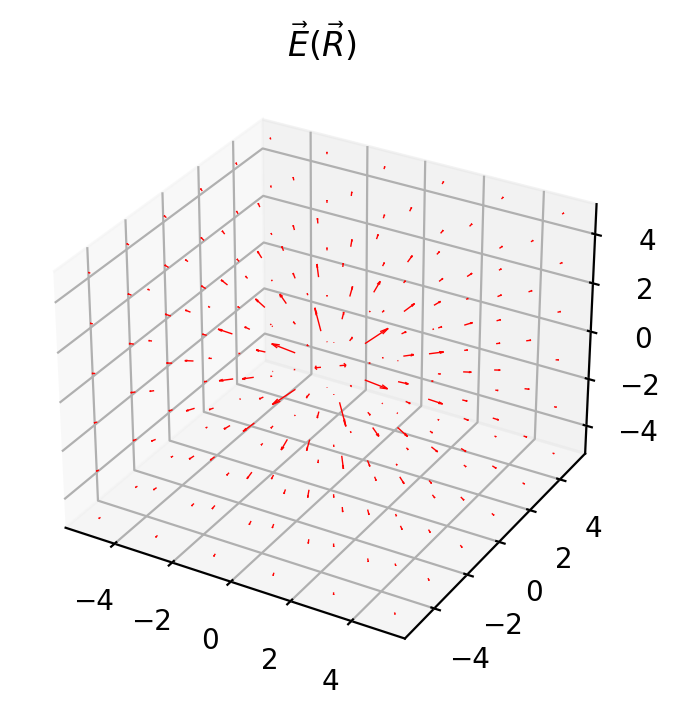

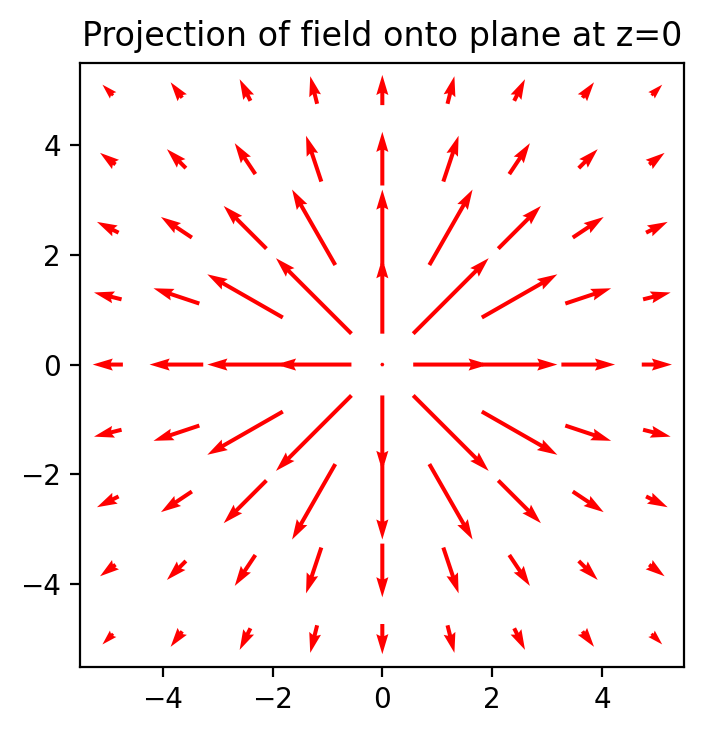

In [103]:
# Create a quiver plot.
# Use a coarser grid.
stride = 40
x = X[::stride,::stride,::stride].copy()
y = Y[::stride,::stride,::stride].copy()
z = Z[::stride,::stride,::stride].copy()
ex = Ex[::stride,::stride,::stride].copy()
ey = Ey[::stride,::stride,::stride].copy()
ez = Ez[::stride,::stride,::stride].copy()

# Set max length to improve visibility in plot.
ecut = 0.1
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ez[ez>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut
ez[ez<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=5, linewidth=0.5, color='red')
ax.set_title(r"$\vec{E}(\vec{R})$")

# Make a 2D plot of a slice of the field.
z0 = 100
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 25
x = X[::stride,::stride,z0].copy()
y = Y[::stride,::stride,z0].copy()
ex = Ex[::stride,::stride,z0].copy()
ey = Ey[::stride,::stride,z0].copy()

# Set max length to improve visibility in plot.
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.quiver(x,y,ex,ey, pivot='middle', scale=0.8, linewidth=0.5, color='red')
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

Change the values of `ecut` and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

The top plot depicts the entire electric field of the charge with vectors to describe the magntude and direction of the field at different locations. The interactive option for this field clears up some of the vectors that were misrepresented due to the plots orientation. 

The bottom plot is a slice of the first plot at a specified height and again dipicts the electric field with vectors. THe closer the specified height is the charge, the larger the vectors will be. Since this plot is only a slice of the original, it lacks an overall view of the charge's electric field, but it can be helpful to remove excess vectors when only a plane needs to be represented. The ecut variable limits vectors from being too long as they can overlap with other vectors when the magnitudes are too great. 

### 6. Streamlines of the Electric Field

The cell below will draw three dimensional "field lines" of the electric field.

(-5.0, 5.0, -5.0, 5.0)

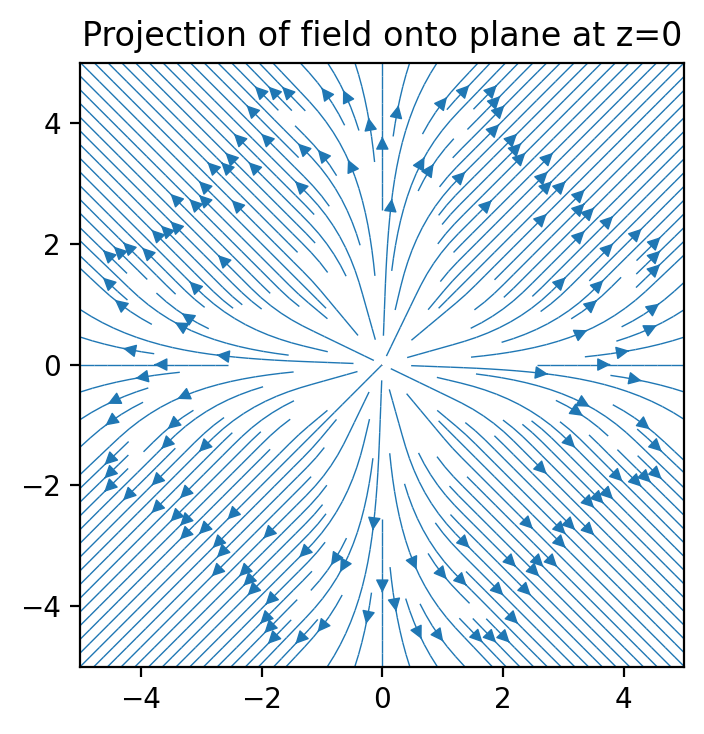

In [113]:
# Make a 2D plot of a slice of the field.
z0 = 100
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 25
x = X[::stride,::stride,z0].copy().T
y = Y[::stride,::stride,z0].copy().T
ex = Ex[::stride,::stride,z0].copy().T
ey = Ey[::stride,::stride,z0].copy().T

# Set max length to improve visibility in plot.
ecut = 0.01
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.streamplot(x,y,ex,ey, linewidth=0.5, density=1.5)
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

Change the values of `ecut` and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This plot shows the projection of the vectors onto a plane specified by the height z0. It seems that the ecut value must first be changed before any noticable change is seen from varying z0. Notable changes occured in the plot only when ecut was very small (0.01). When z0 = 100 (z = 0), the projected vectors have a heavy diagonal bias, while when z0 = 200 (z = 5), the projected vectors seem to disperse in a more circular pattern.

## Reflection

All of these plots are representations of the same underlying physical entity: the electromagnetic field of a single point charge.  Which did you find most useful?  Confusing?  Can you think of another way to represent a three-dimensional electric field or scalar field?

***Type your response in the box below.***

I found that the 2D representation of the potential and electric field of the charge were the most useful and easiest to understand. The surface plot and heatmap of the electric field really helped piece together the 1D graphs of the electric field. The most confusing representation was the streamlines of the electric field as the changes in the plots were negligible until the ecut variable was reduced considerablely. I am also not sure what information the streamlines of the electric field provide that would be more useful that the other representations.

Another way one could represent the electric field could be with animated vectors that travel long their path as time changes. A similar alternative can be done with the heatmap to animate the change in electric filed over time.  